#Quiz4
#***Logistic Regression***



#Introduction
The purpose of this study is to construct and compare/contrast a series of binary logistic regression model that predict whether or not a given mortagage application is likely to be denied. 

**Variables**
The data set comprise 2,381 observations of 1 response/dependent variable (which indicates whether or not a mortgage application was denied) and 12 explanatory/independent variables.

**Variable Descriptions:**

1. dir: debt payments to total income ratio.

2. hirL housing expenses to income ratio

3. lvr: ratio of size of loan to assessed value of property

4. ccs: consumer credit score from 1 to 6 (a low value being a good score)

5. mcs: mortgage credit score from 1 to 4 (a low value being a good score)

6. pbcr: public bad credit record ?

7. dmi: denied mortgage insurance ?

8. self: self employed ?

9. single: is the applicant single ?

10. uria: 1989 Massachusetts unemployment rate in the applicant's industry

11. condominium: is unit a condominium ? (was called comdominiom in version 0.2-9 and earlier versions of the package)

12. black: is the applicant black ? 

13. deny: mortgage application denied ?

#Initial Exploratory Data Analysis

First, read the data into python using pandas, read csv file.

In [ ]:
# importing libraries needed
import pandas as pd
import numpy as np


#loading the data from my own github repo
df=pd.read_csv("https://raw.githubusercontent.com/JoannePyo/Data_Analysis_381/main/Quiz_Assignment4/HDMA%20Boston%20Housing%20Data.csv.csv")

#create a second stored value of original data as a safety
df_orignal =df

#check the dataset 
print("Observations: {}".format(df.shape[0]))
df

Observations: 2381


,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221000,0.221000,0.800000,5.000000,2.000000,no,no,no,no,3.900000,0,no,no
1,2,0.265000,0.265000,0.921875,2.000000,2.000000,no,no,no,yes,3.200000,0,no,no
2,3,0.372000,0.248000,0.920398,1.000000,2.000000,no,no,no,no,3.200000,0,no,no
3,4,0.320000,0.250000,0.860465,1.000000,2.000000,no,no,no,no,4.300000,0,no,no
4,5,0.360000,0.350000,0.600000,1.000000,1.000000,no,no,no,no,3.200000,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2377,0.300000,0.300000,0.777049,1.000000,2.000000,no,no,no,yes,3.200000,1,no,no
2377,2378,0.260000,0.200000,0.526761,2.000000,1.000000,no,no,no,no,3.100000,0,no,no
2378,2379,0.320000,0.260000,0.753846,6.000000,1.000000,yes,no,no,yes,3.100000,1,yes,yes
2379,2380,0.350000,0.260000,0.813559,2.000000,2.000000,no,no,no,yes,4.300000,1,no,yes


In [ ]:
#check the shape for the dataframe
df.shape

(2381, 14)

Finding:
> There has 2381 rows and 14 columns

Delete first column. not necessary

In [ ]:
# Delete first column
df = df.drop("Unnamed: 0", axis =1)
df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [ ]:
#check the shape for the dataframe 
df.shape

(2381, 13)

>Now, there has 2381 rows and 13 columns.

In [ ]:
#statistical summary of numeric variables:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dir,2381.0,0.330814,0.107235,0.00,0.28000,0.330000,0.370000,3.00
hir,2381.0,0.255346,0.096635,0.00,0.21400,0.260000,0.298800,3.00
lvr,2381.0,0.737760,0.178715,0.02,0.65285,0.779412,0.868421,1.95
ccs,2381.0,2.116387,1.666370,1.00,1.00000,1.000000,2.000000,6.00
mcs,2381.0,1.721008,0.537169,1.00,1.00000,2.000000,2.000000,4.00
uria,2381.0,3.774496,2.026636,1.80,3.10000,3.200000,3.900000,10.60
comdominiom,2381.0,0.288114,0.452980,0.00,0.00000,0.000000,1.000000,1.00


In [ ]:
#Identify the Data Types
df_info = pd.DataFrame(df.dtypes,columns=['Dtype'])

#Identify the unique values
df_info['Nunique'] = df.nunique()

#check missing values for each column
df_info['MissingValues']=df.isnull().sum()

# Identify the count for each variable
df_info['Count']=df.count()

# Identify the zero values for each variable
df_info['ZeroValues']=(df==0).sum()

# how many '?' values
df_info['?Values']=(df=='?').sum()

df_info

,Dtype,Nunique,MissingValues,Count,ZeroValues,?Values
dir,float64,520,0,2381,1,0
hir,float64,501,0,2381,3,0
lvr,float64,1538,0,2381,0,0
ccs,float64,7,0,2381,0,0
mcs,float64,5,0,2381,0,0
pbcr,object,2,1,2380,0,0
dmi,object,2,0,2381,0,0
self,object,2,1,2380,0,0
single,object,2,0,2381,0,0
uria,float64,11,0,2381,0,0


Findings:
> 1. The dataset consists of 13 variables and 2381 observations.
2. There has one missing values in the pbcr data.
3. The types of data are object, integer, and float.
4. There are som zero values in dir, hir, and comdominiom. comdominiom has 1,695 zero values. 
5. There has no "?" value.

In [ ]:
value = df[['ccs', 'mcs', 'pbcr','dmi','self','single','uria','comdominiom','black','deny']].copy()
for i in range(len(value.columns)):
    print(value.columns[i] + ":")
    print(value[value.columns[i]].unique())

ccs:
[5.         2.         1.         6.         3.         4.
 2.11638656]
mcs:
[2.        1.        4.        3.        1.7210084]
pbcr:
['no' 'yes' nan]
dmi:
['no' 'yes']
self:
['no' 'yes' nan]
single:
['no' 'yes']
uria:
[ 3.9000001   3.20000005  4.30000019  1.79999995  3.0999999  10.60000038
  5.30000019  3.5999999   2.          8.89999962  3.77449585]
comdominiom:
[0 1]
black:
['no' 'yes']
deny:
['no' 'yes']


Check numerical and categorical columns

In [ ]:
num_columns = []
ca_columns = []

for x in df.columns[:]:
    if(df[x].dtype=='object'):
        ca_columns.append(x)
    else:
        num_columns.append(x)
        
print('Numerical variables:',num_columns)
print('Categorical variables:',ca_columns)

Numerical variables: ['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom']
Categorical variables: ['pbcr', 'dmi', 'self', 'single', 'black', 'deny']


Findings:
> 1. We can know the numerical variables of the original dataset are 7 attributes, including 'dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom'.
2. The categorical variables of the original dataset include 6 attributes, including 'pbcr', 'dmi', 'self', 'single', 'black', 'deny'.

Visualize numerical columns

Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

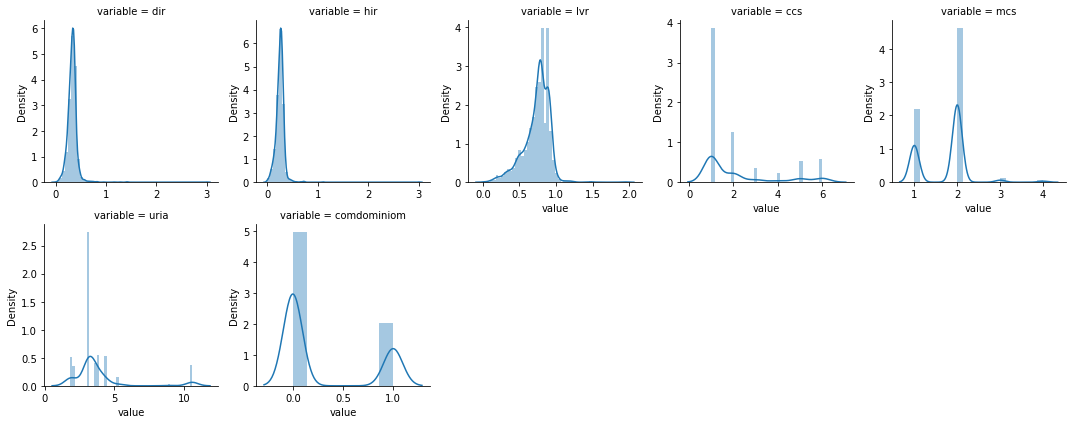

In [ ]:
# Distributions for each of numerical variables.

import seaborn as sns 
import matplotlib.pyplot as plt

Dis_num = pd.melt(df[num_columns])
n = sns.FacetGrid (Dis_num, col='variable', col_wrap=5, sharex=False, sharey = False)
n = n.map(sns.distplot, 'value')
n

Visualize categorical columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

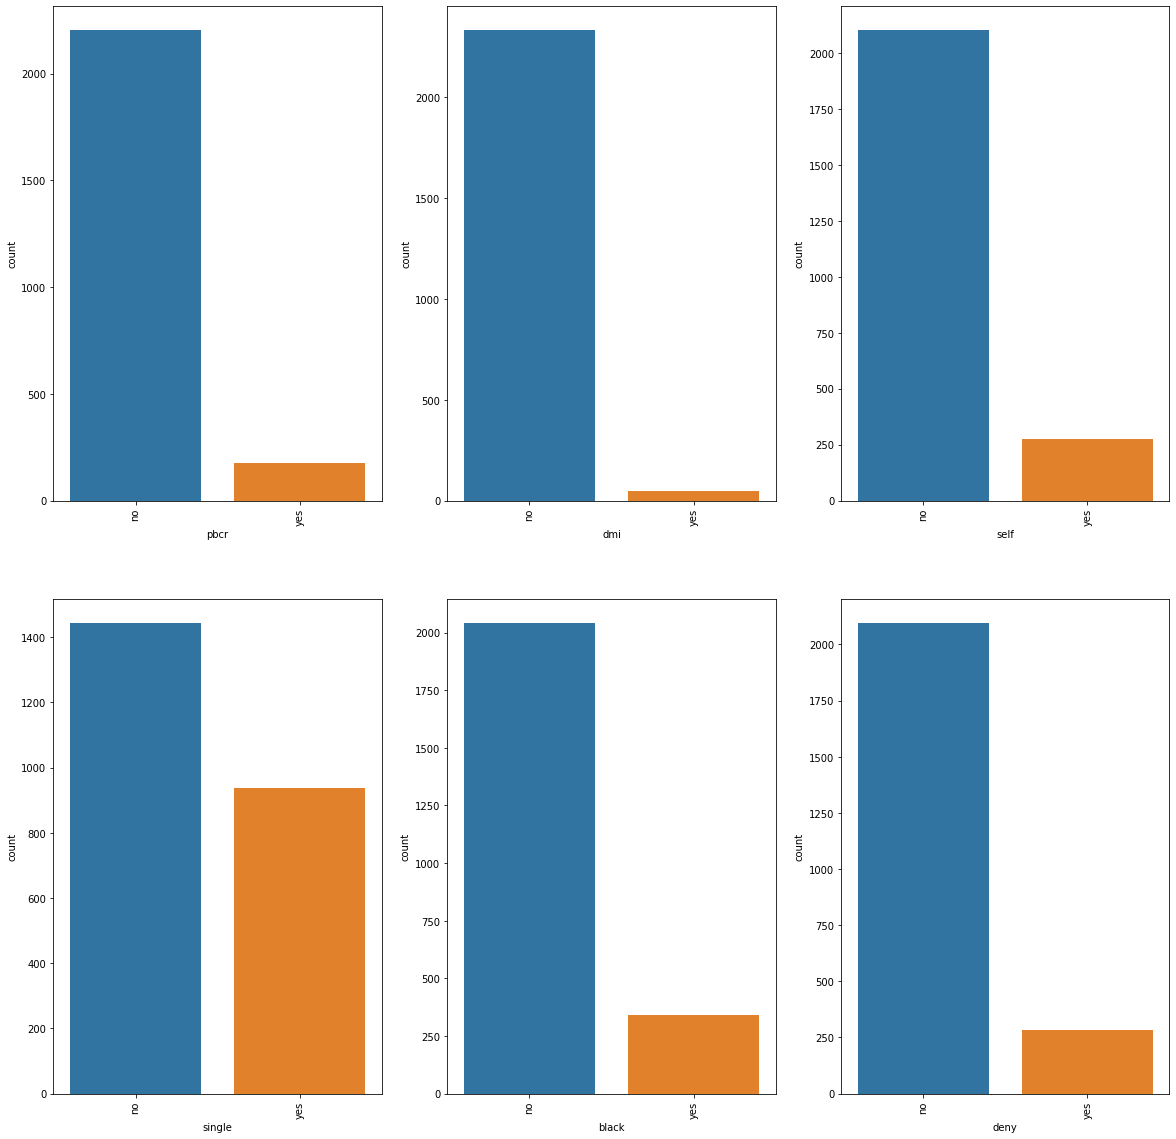

In [ ]:
# create the bar chart for each categorical columns
fig, ax = plt.subplots(2,3, figsize=(20, 20))
for variable, subplot in zip(ca_columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Finding:
> There has many yes in single and less yes in dmi.


Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05e4733b10>,
      dtype=object)

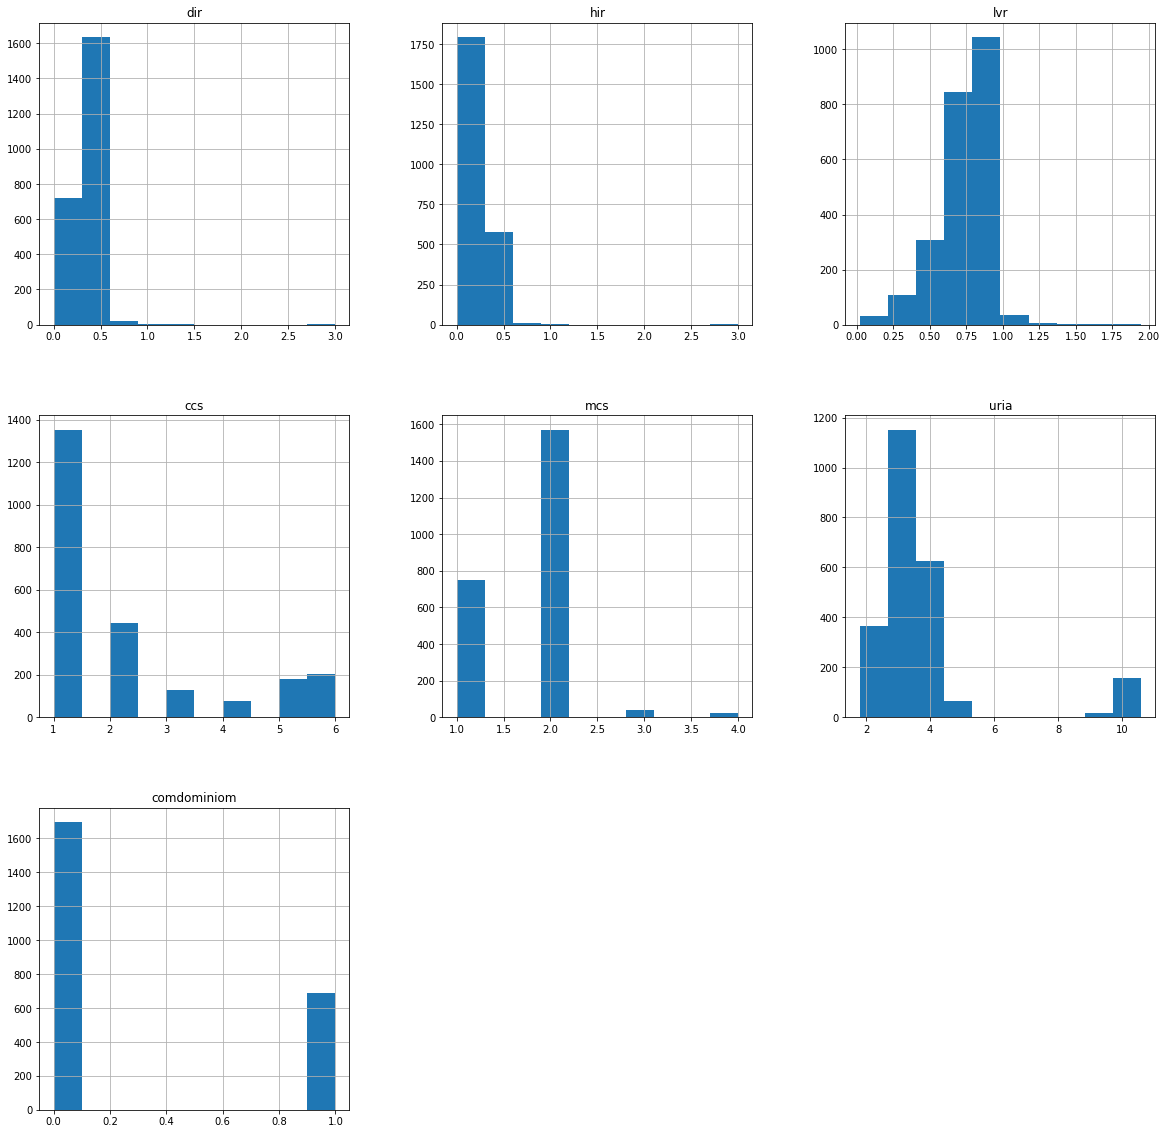

In [ ]:
# Get the histogram
df.hist(figsize = (20,20))

Finding:
> histogram looks good.

<Figure size 432x288 with 0 Axes>

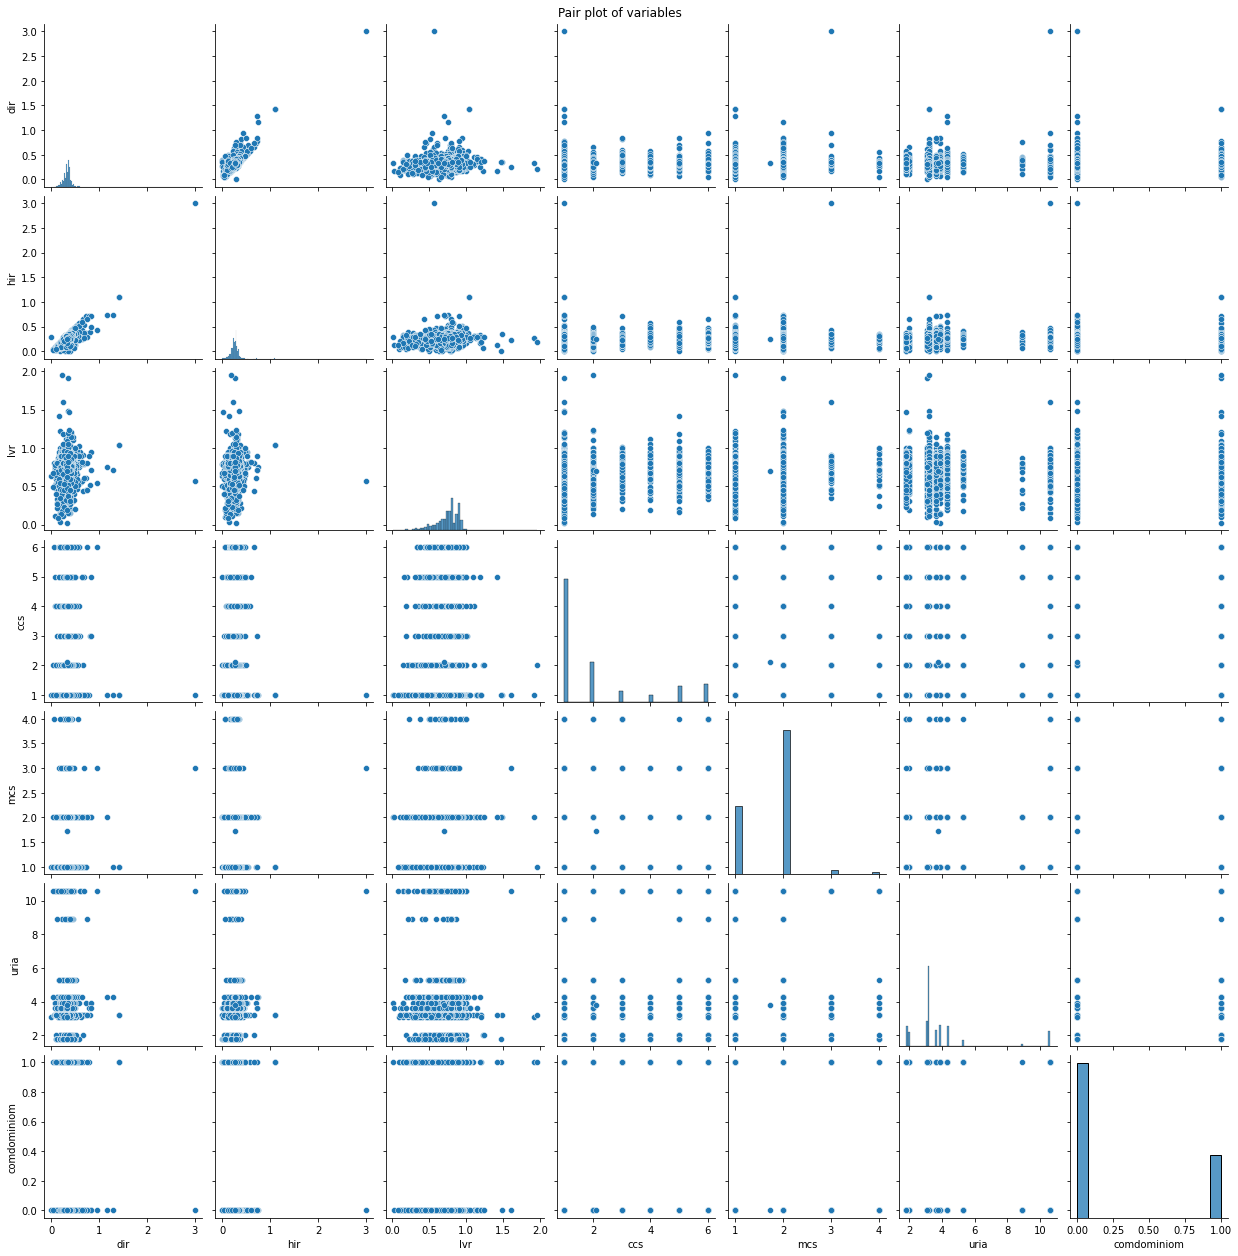

In [ ]:
fig2=plt.figure()
g=sns.pairplot(df)
g.fig.suptitle("Pair plot of variables", y=1)
plt.show()

 boxplots

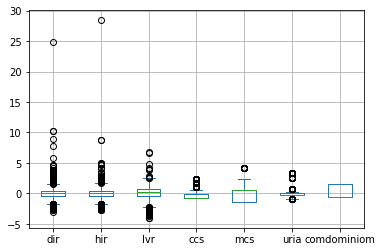

In [ ]:
numericDataColumns = ['dir', 'hir', 'lvr','ccs','mcs','uria','comdominiom']
values = df[numericDataColumns].copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
vals_scaled = scaler.fit_transform(values)
vals_scaled = pd.DataFrame(vals_scaled, columns=numericDataColumns)

vals_scaled.plot.box(grid='True')

Heatmap

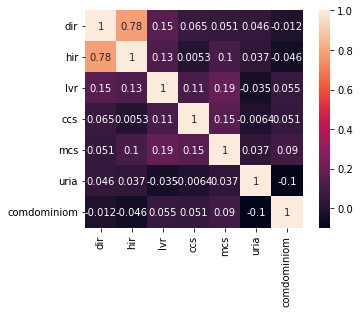

In [ ]:
# Correlation Map of our NON-CATEGORICAL DATA
cor = df.corr()
sns.heatmap(data=cor, square=True , annot=True, cbar=True)

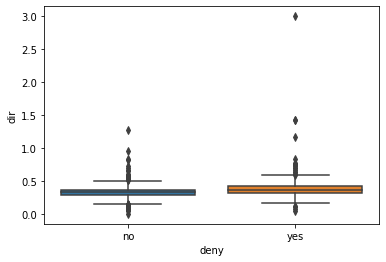

In [ ]:
#seaborn
sns.boxplot(x ='deny', y ='dir',data = df )

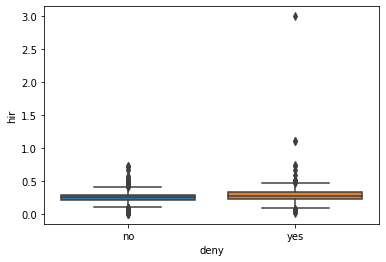

In [ ]:
sns.boxplot(x ='deny', y ='hir',data = df )

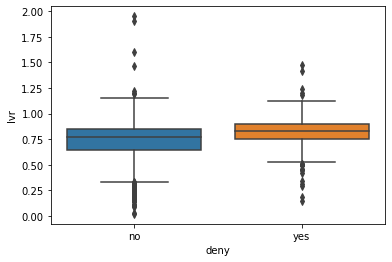

In [ ]:
sns.boxplot(x ='deny', y ='lvr',data = df )

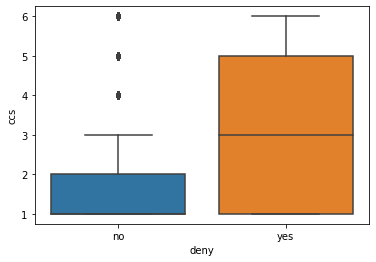

In [ ]:
sns.boxplot(x ='deny', y ='ccs',data = df )

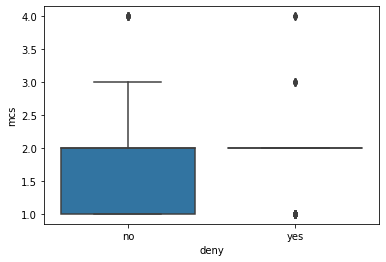

In [ ]:
sns.boxplot(x ='deny', y ='mcs',data = df )

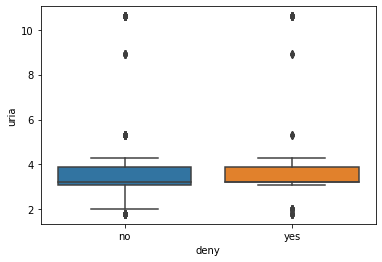

In [ ]:
sns.boxplot(x ='deny', y ='uria',data = df )

Findings:
> 1. There has relationship with deny and dir.
2. There has no relationship with dent and hir.
3. There has relationship with deny and lvr.
4. There has **big** relationship with **deny and ccs.** 
5. There has no relationship with dent and mcs.
6. There has no relationship with dent and uria.

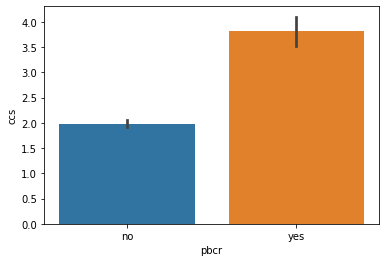

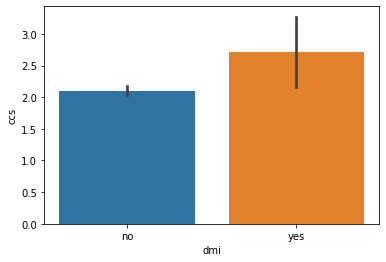

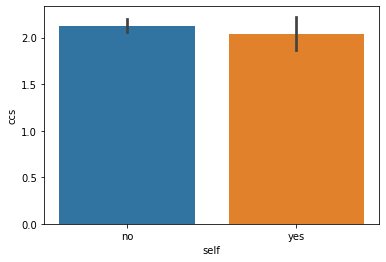

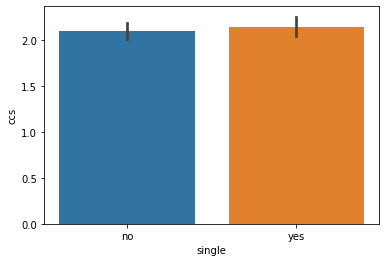

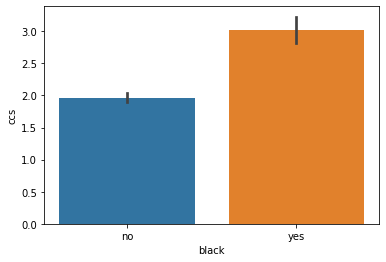

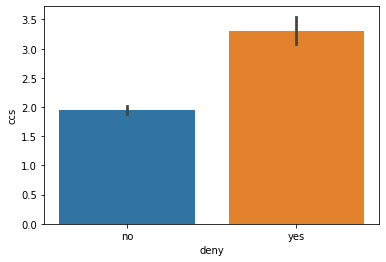

In [ ]:
# create the bar chart for categorical variable
for i in ca_columns:
    plt.figure()
    sns.barplot(x=i , y='ccs', data=df)
    plt.plot()

Findings:
>1. **There has more yes in ccs and pbcr. Too many yes in there.** 
2. There has more yes in ccs and dmi.
3. There has more yes in ccs and single. 
3. There has more yes in ccs and black.
4. **There has more yes in ccs and deny.**
5.  There has less yes in ccs and self.
6. pbcr ha

# Data Cleaning

###Missing data
Replace "?" with NaN and Show columns with missing values

In [ ]:
# replace '?' with NaN
df2 = df.replace('?',np.NAN) 
# Show missing value
missing = df2.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing

pbcr    1
self    1
dtype: int64

In [ ]:
# check the numbers of completed rows without missing values
df2.shape[0] - df2.isnull().sum(axis=0).shape[0]

2368

Text(0.5, 1.0, ' Percents of non-missing data ')

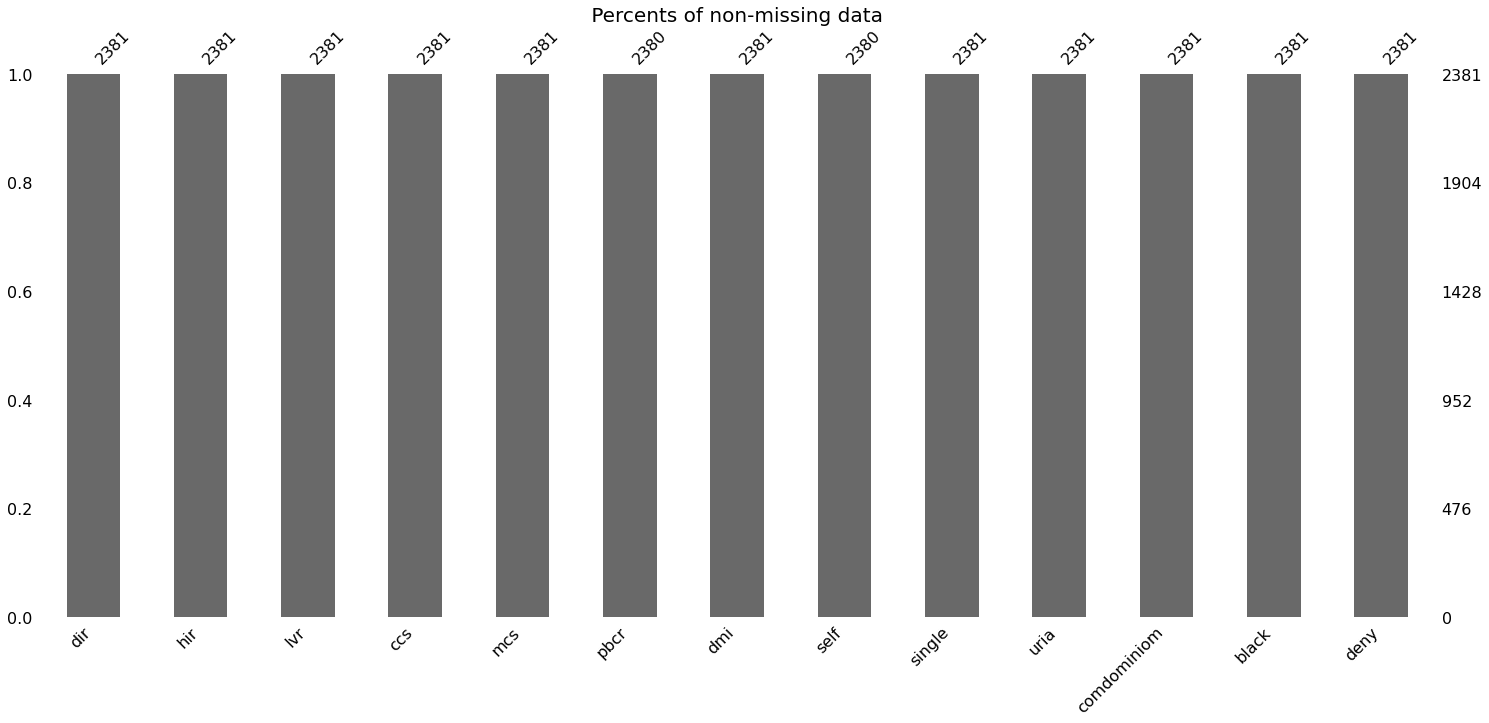

In [ ]:
# create the bar charts to show percents of nonmissing databy missingo function
import missingno as msno 

msno.bar(df2)
plt.title(' Percents of non-missing data ',fontsize=20)

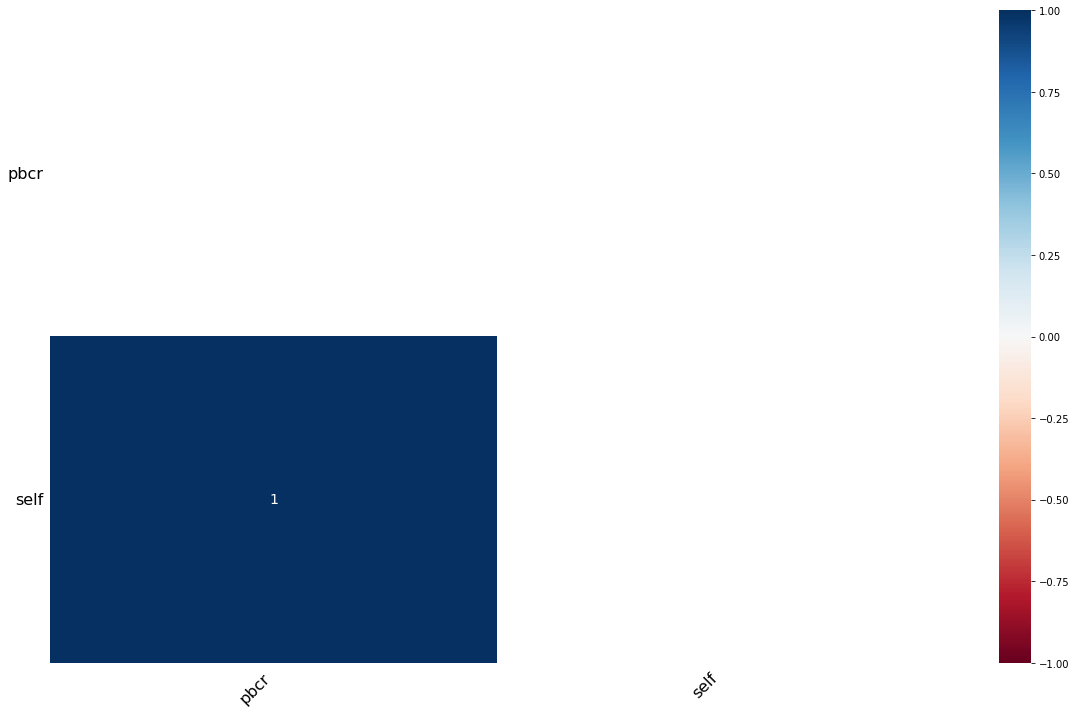

In [ ]:
# Visualize the correlation between the number of 
# missing values in different columns as a heatmap 
msno.heatmap(df);

Finding:
>There has only pbcr and self have missing one data each. 

Handle missing values (Fill missing values)

In [ ]:
# create a new dataframe 
df3 = df2.copy()

In [ ]:
# check out these rows that contain the missing values in pbcr
df3[df3['pbcr'].isnull()]

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
2380,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,0,no,no


In [ ]:
#fill the missing value with no.
df3['pbcr']= df3['pbcr'].fillna('no')
df3['self']= df3['self'].fillna('no')

In [ ]:
# group by the pbcr column 
df3.groupby(['pbcr']).count()

,dir,hir,lvr,ccs,mcs,dmi,self,single,uria,comdominiom,black,deny
pbcr,,,,,,,,,,,,
no,2206,2206,2206,2206,2206,2206,2206,2206,2206,2206,2206,2206
yes,175,175,175,175,175,175,175,175,175,175,175,175


In [ ]:
# group by the self column 
df3.groupby(['self']).count()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,single,uria,comdominiom,black,deny
self,,,,,,,,,,,,
no,2104,2104,2104,2104,2104,2104,2104,2104,2104,2104,2104,2104
yes,277,277,277,277,277,277,277,277,277,277,277,277


Result:
> All missing values in pbcr and self columns are filled

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, ' Percents of non-missing data ')

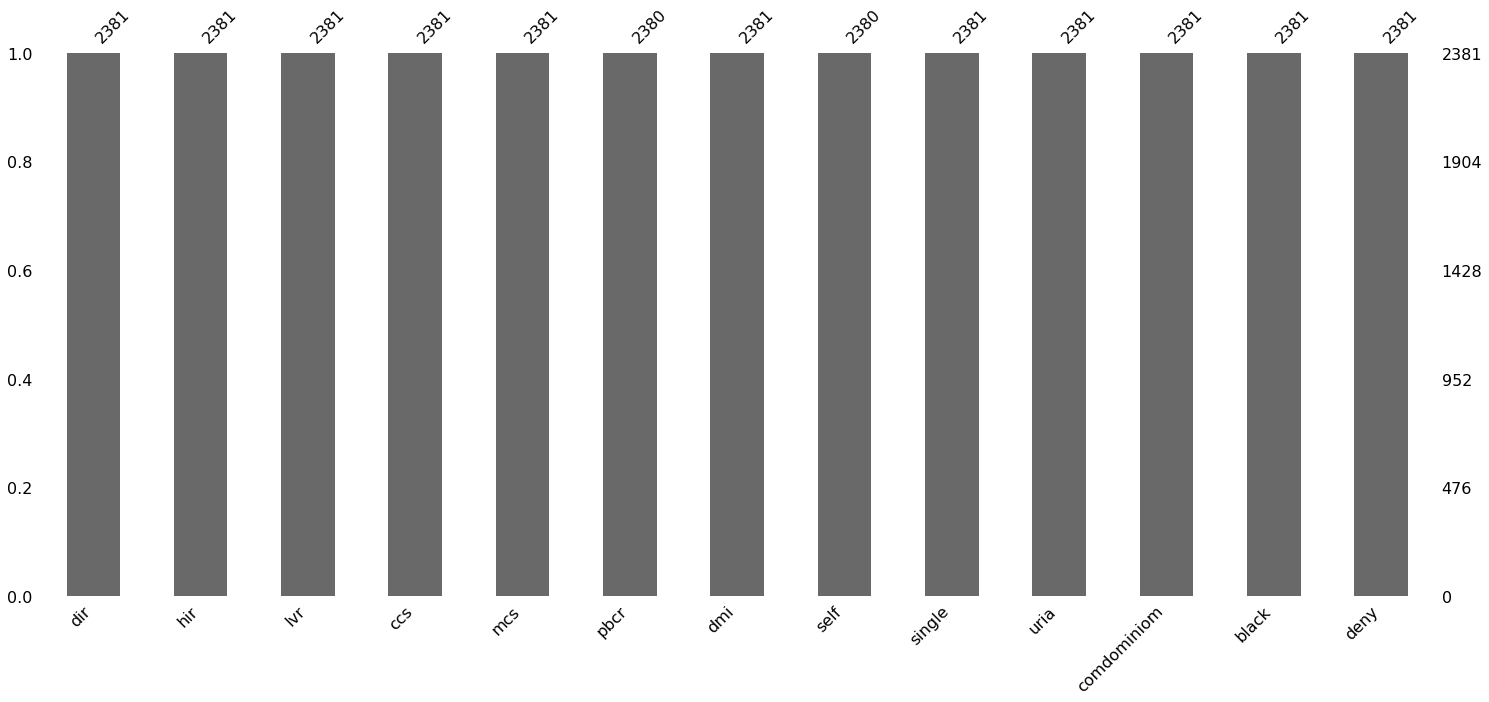

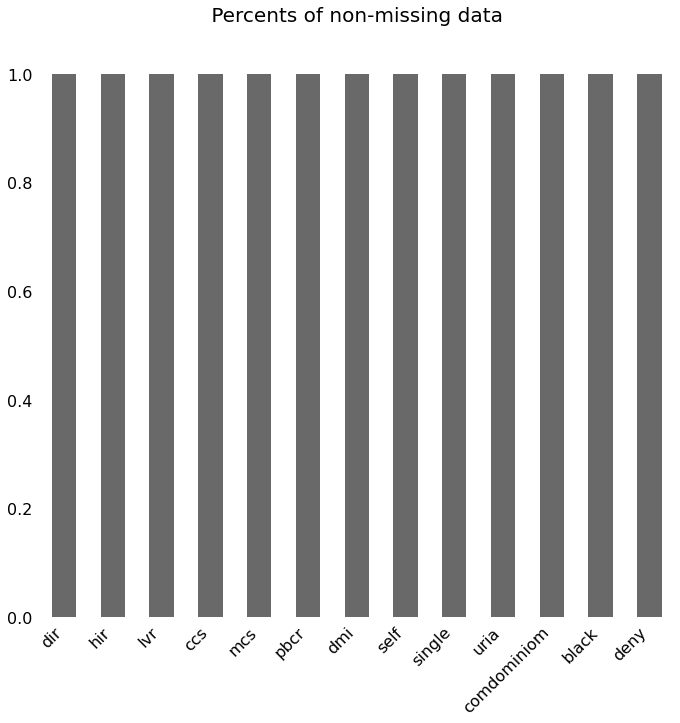

In [ ]:
# compare the Percentage of non-missing data with pandas.
msno.bar(df)
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title(' Percents of missing data ',fontsize=20)

msno.bar(df3)
plt.subplot(121)
plt.title(' Percents of non-missing data ',fontsize=20)

Result:
> All the missing values have been filled, and there is no missing values in the new dataframe.

###Imputation

In [ ]:
#Simple Imputer.
#import the SimpleImputer library
from sklearn.impute import SimpleImputer

imp= SimpleImputer(missing_values = np.nan, strategy = 'most_frequent', fill_value =32)
imp.fit(df3['pbcr'].values.reshape(-1,1))
df3['pbcr']=imp.transform(df3['pbcr'].values.reshape(-1,1))
df3['pbcr'].describe()

count     2381
unique       2
top         no
freq      2206
Name: pbcr, dtype: object

In [ ]:
imp= SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value =32)
imp.fit(df3['self'].values.reshape(-1,1))
df3['self']=imp.transform(df3['self'].values.reshape(-1,1))
df3['self'].describe()

count     2381
unique       2
top         no
freq      2104
Name: self, dtype: object

### Regression

In [ ]:
#See the total amount of rows and columns
df3.shape

(2381, 13)

In [ ]:
#see how many got denied and how many got accepted
df3['deny'].value_counts()

no     2096
yes     285
Name: deny, dtype: int64

In [ ]:
percent_denied = 285/2381
percent_accepted = 2096/2381
print(f"Percent accepted : {percent_accepted}%")
print(f"Percent denied: {percent_denied}%")

Percent accepted : 0.880302393952121%
Percent denied: 0.11969760604787905%


Finding:
>There has 0.88% accepted percentage, and almost 0.12% denied percentage.

In [ ]:
#dummy value is created for deny 
#0 : not deny
#1 (or yes): deny 
df3['deny'] = (df3['deny'] == 'yes').astype(int)
df3['pbcr'] = (df3['pbcr'] == 'yes').astype(int)
df3['dmi'] = (df3['dmi'] == 'yes').astype(int)
df3['single'] = (df3['single'] == 'yes').astype(int)

In [ ]:
selected_Columns = ['pbcr', 'dmi', 'single']
x_deny = df3[selected_Columns].values
y_deny = df3['deny'].values

xTest = df[selected_Columns].values

#checking the first 10
x_deny[:10]

array([[0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()
model.fit(x_deny,y_deny)

LogisticRegression()

In [ ]:
model.score(x_deny,y_deny)

0.8971020579588408

In [ ]:
print(selected_Columns)
model.coef_

['pbcr', 'dmi', 'single']


array([[1.95092596, 3.78119467, 0.50353145]])

Findings:
> 1. Have a public bad credit record can affect to get denied.
2. Being **denied mortagage insurance** has **most** affect to get denied. 
3. Being single has more chance to get loan. lower chance to get denied. 

In [ ]:
#checking first 10. 
selected_Columns2 = ['dir','lvr','ccs']
x_deny2 = df3[selected_Columns2].values
y_deny2 = df3['deny'].values
x_deny2[:10]

array([[0.221     , 0.8       , 5.        ],
       [0.265     , 0.921875  , 2.        ],
       [0.37200001, 0.92039801, 1.        ],
       [0.32      , 0.86046512, 1.        ],
       [0.36      , 0.6       , 1.        ],
       [0.24      , 0.51052632, 1.        ],
       [0.35      , 0.74666667, 1.        ],
       [0.28      , 0.85      , 2.        ],
       [0.31      , 0.89726027, 2.        ],
       [0.18      , 0.35874439, 2.        ]])

In [ ]:
model = LogisticRegression()
model.fit(x_deny2,y_deny2)

LogisticRegression()

In [ ]:
model.score(x_deny2,y_deny2)

0.8836623267534649

In [ ]:
print(selected_Columns2)
model.coef_

['dir', 'lvr', 'ccs']


array([[3.48474729, 2.41317155, 0.36756501]])

Findings:
> 1. Having higher **debt payments to total income ration** can **most** affect to get denied.
2. Having ratio of size of loan to assessed value of property can affect to get denied. 
3. Having consumer credit score is more chance to get loan.

Result:
> Having denied mortgage insurance is most affect to get denied. 

## Conclusion:
The purpose of this study is to construct and compare/contrast a series of binary logistic regression model that predict whether or not a given mortagage application is likely to be denied.  There has the data set comprise 2,381 observations and 12 explanatory/independent variables. These are  dir, hir, lvr, ccs, mcs, pbcr, dmi, self, single, uria, comdominiom, black, and deny. 
I use graphs to more clear to explan the datas. Finally, having denied mortgage isurance is most affect to get denied. 